In [12]:
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
utils_dir = os.path.join(parent_dir, "src", "utils")
sys.path.append(utils_dir)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import tensorflow as tf

In [13]:
X_path= os.path.join("..", "data","enriched_input", "X_train.csv")
X = pd.read_csv(X_path, delimiter=',')

y_path= os.path.join("..", "data","enriched_input", "y_train.csv")
y = pd.read_csv(y_path, delimiter=',')

In [14]:
X.set_index("DELIVERY_START", inplace=True)
y.set_index("DELIVERY_START", inplace=True)
X.index = pd.to_datetime(X.index, utc=True)
y.index = pd.to_datetime(y.index, utc=True)

In [15]:
X_train = X.loc[X.index < '2022-12-29']
X_test = X.loc[X.index >= '2022-12-29']
y_train = y.loc[X.index < '2022-12-29']
y_test = y.loc[X.index >= '2022-12-29']

In [18]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.001)
reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose = True)

[0]	validation_0-rmse:41.82626	validation_1-rmse:16.84144
[1]	validation_0-rmse:41.82244	validation_1-rmse:16.84141
[2]	validation_0-rmse:41.81863	validation_1-rmse:16.84139
[3]	validation_0-rmse:41.81483	validation_1-rmse:16.84136
[4]	validation_0-rmse:41.81103	validation_1-rmse:16.84133
[5]	validation_0-rmse:41.80724	validation_1-rmse:16.84131
[6]	validation_0-rmse:41.80346	validation_1-rmse:16.84129
[7]	validation_0-rmse:41.79968	validation_1-rmse:16.84126
[8]	validation_0-rmse:41.79591	validation_1-rmse:16.84124
[9]	validation_0-rmse:41.79215	validation_1-rmse:16.84122


[10]	validation_0-rmse:41.78840	validation_1-rmse:16.84119
[11]	validation_0-rmse:41.78465	validation_1-rmse:16.84117
[12]	validation_0-rmse:41.78091	validation_1-rmse:16.84115
[13]	validation_0-rmse:41.77712	validation_1-rmse:16.84113
[14]	validation_0-rmse:41.77333	validation_1-rmse:16.84111
[15]	validation_0-rmse:41.76956	validation_1-rmse:16.84109
[16]	validation_0-rmse:41.76579	validation_1-rmse:16.84107
[17]	validation_0-rmse:41.76203	validation_1-rmse:16.84105
[18]	validation_0-rmse:41.75827	validation_1-rmse:16.84103
[19]	validation_0-rmse:41.75452	validation_1-rmse:16.84101
[20]	validation_0-rmse:41.75078	validation_1-rmse:16.84099
[21]	validation_0-rmse:41.74704	validation_1-rmse:16.84097
[22]	validation_0-rmse:41.74331	validation_1-rmse:16.84095
[23]	validation_0-rmse:41.73959	validation_1-rmse:16.84094
[24]	validation_0-rmse:41.73587	validation_1-rmse:16.84092
[25]	validation_0-rmse:41.73216	validation_1-rmse:16.84090
[26]	validation_0-rmse:41.72845	validation_1-rmse:16.840

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature Importance'}>

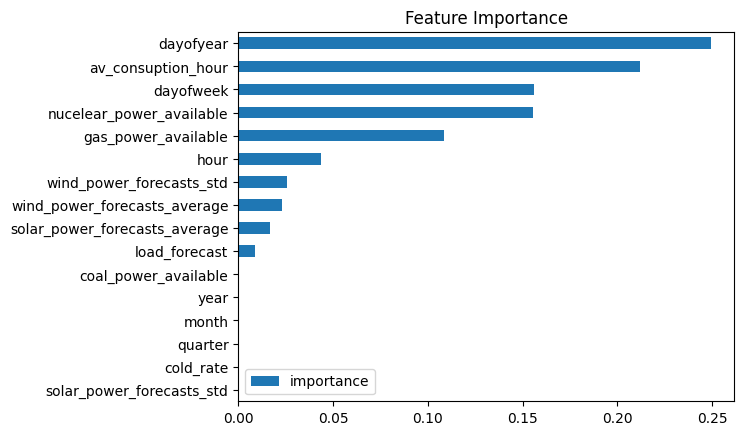

In [20]:
fi = pd.DataFrame(data = reg.feature_importances_,
             index = reg.feature_names_in_,
             columns = ["importance"])
fi.sort_values("importance").plot(kind = "barh", title="Feature Importance")